In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv('rating.csv')

In [3]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
anime.describe(include='object')

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [7]:
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [9]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [10]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [11]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

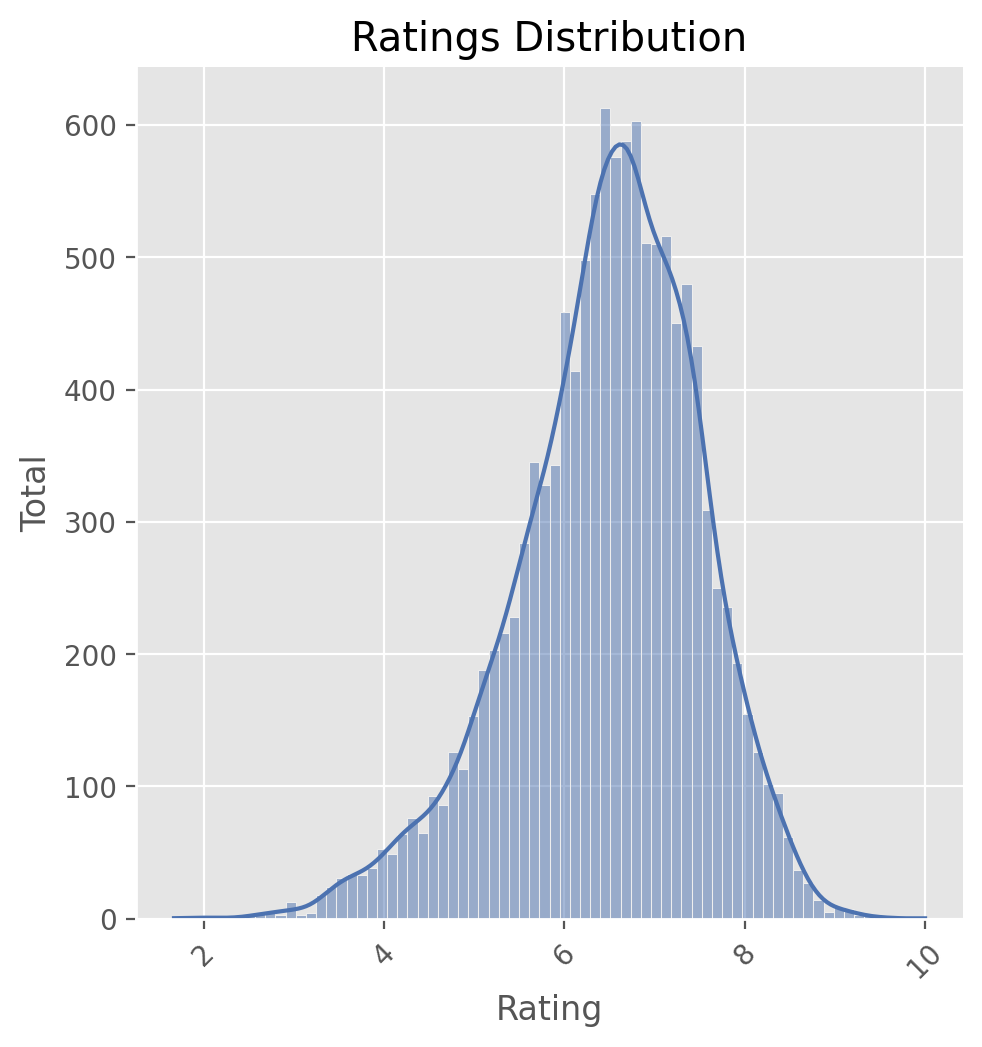

In [12]:
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=anime, x='rating',kde=True)

plt.xlabel('Rating')
plt.ylabel('Total')
plt.title('Ratings Distribution')
plt.xticks(rotation=45)

plt.show()

In [13]:
anime['rating'].fillna(anime['rating'].median(),inplace = True)

In [14]:
anime['type'].fillna(anime['type'].mode()[0],inplace = True)
anime['genre'].fillna(anime['genre'].mode()[0],inplace = True)

In [15]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [16]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [17]:
anime.duplicated().sum()

0

In [18]:
anime['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64

In [19]:
anime[anime['name'].isin(['Shi Wan Ge Leng Xiaohua','Saru Kani Gassen'])]

,anime_id,name,genre,type,episodes,rating,members
10140,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


In [20]:
rating.duplicated().sum()

1

In [21]:
rating.drop_duplicates()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [22]:
df = pd.merge(anime,rating,on = "anime_id",suffixes = [None,"_user"])
df = df.rename(columns = {"rating_user": "user_rating"})
print("Shape of merged data:", df.shape)

Shape of merged data: (7813727, 9)


In [23]:
df

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


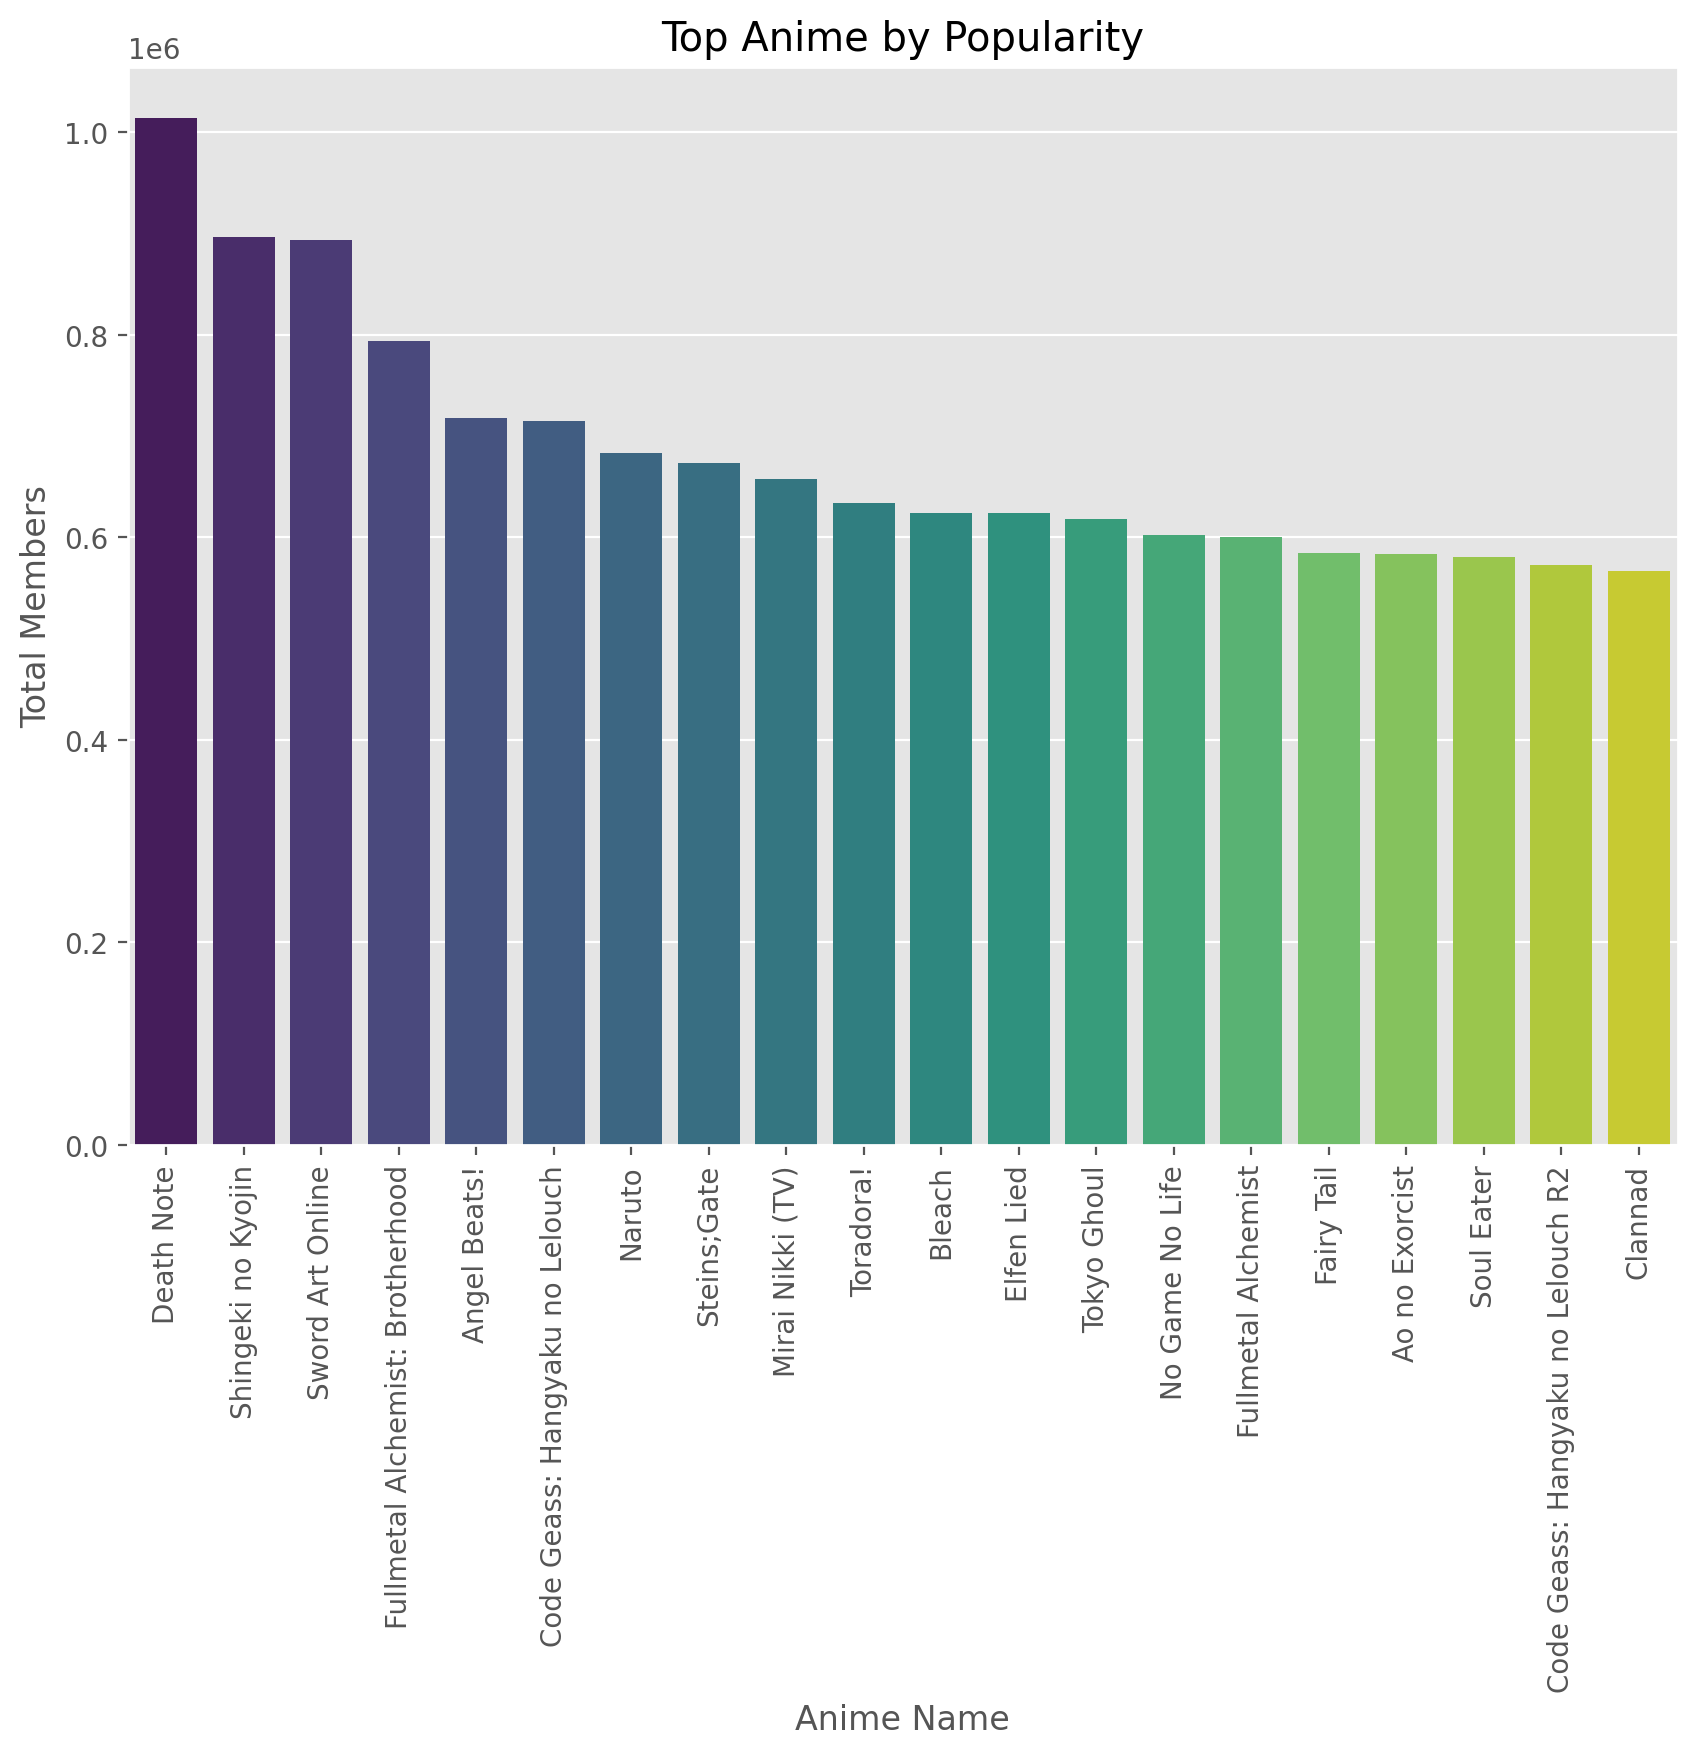

In [24]:
top_anime = anime.sort_values(by="members", ascending=False)

# Set a custom color palette for the bar plot
custom_palette = sns.color_palette("viridis", len(top_anime[:20]))

sns.barplot(
    x=top_anime["name"][:20],
    y=top_anime["members"][:20],
    palette=custom_palette  # Use the custom color palette
)
plt.xlabel("Anime Name")
plt.ylabel("Total Members")
plt.title("Top Anime by Popularity")
plt.xticks(rotation=90)

plt.show()

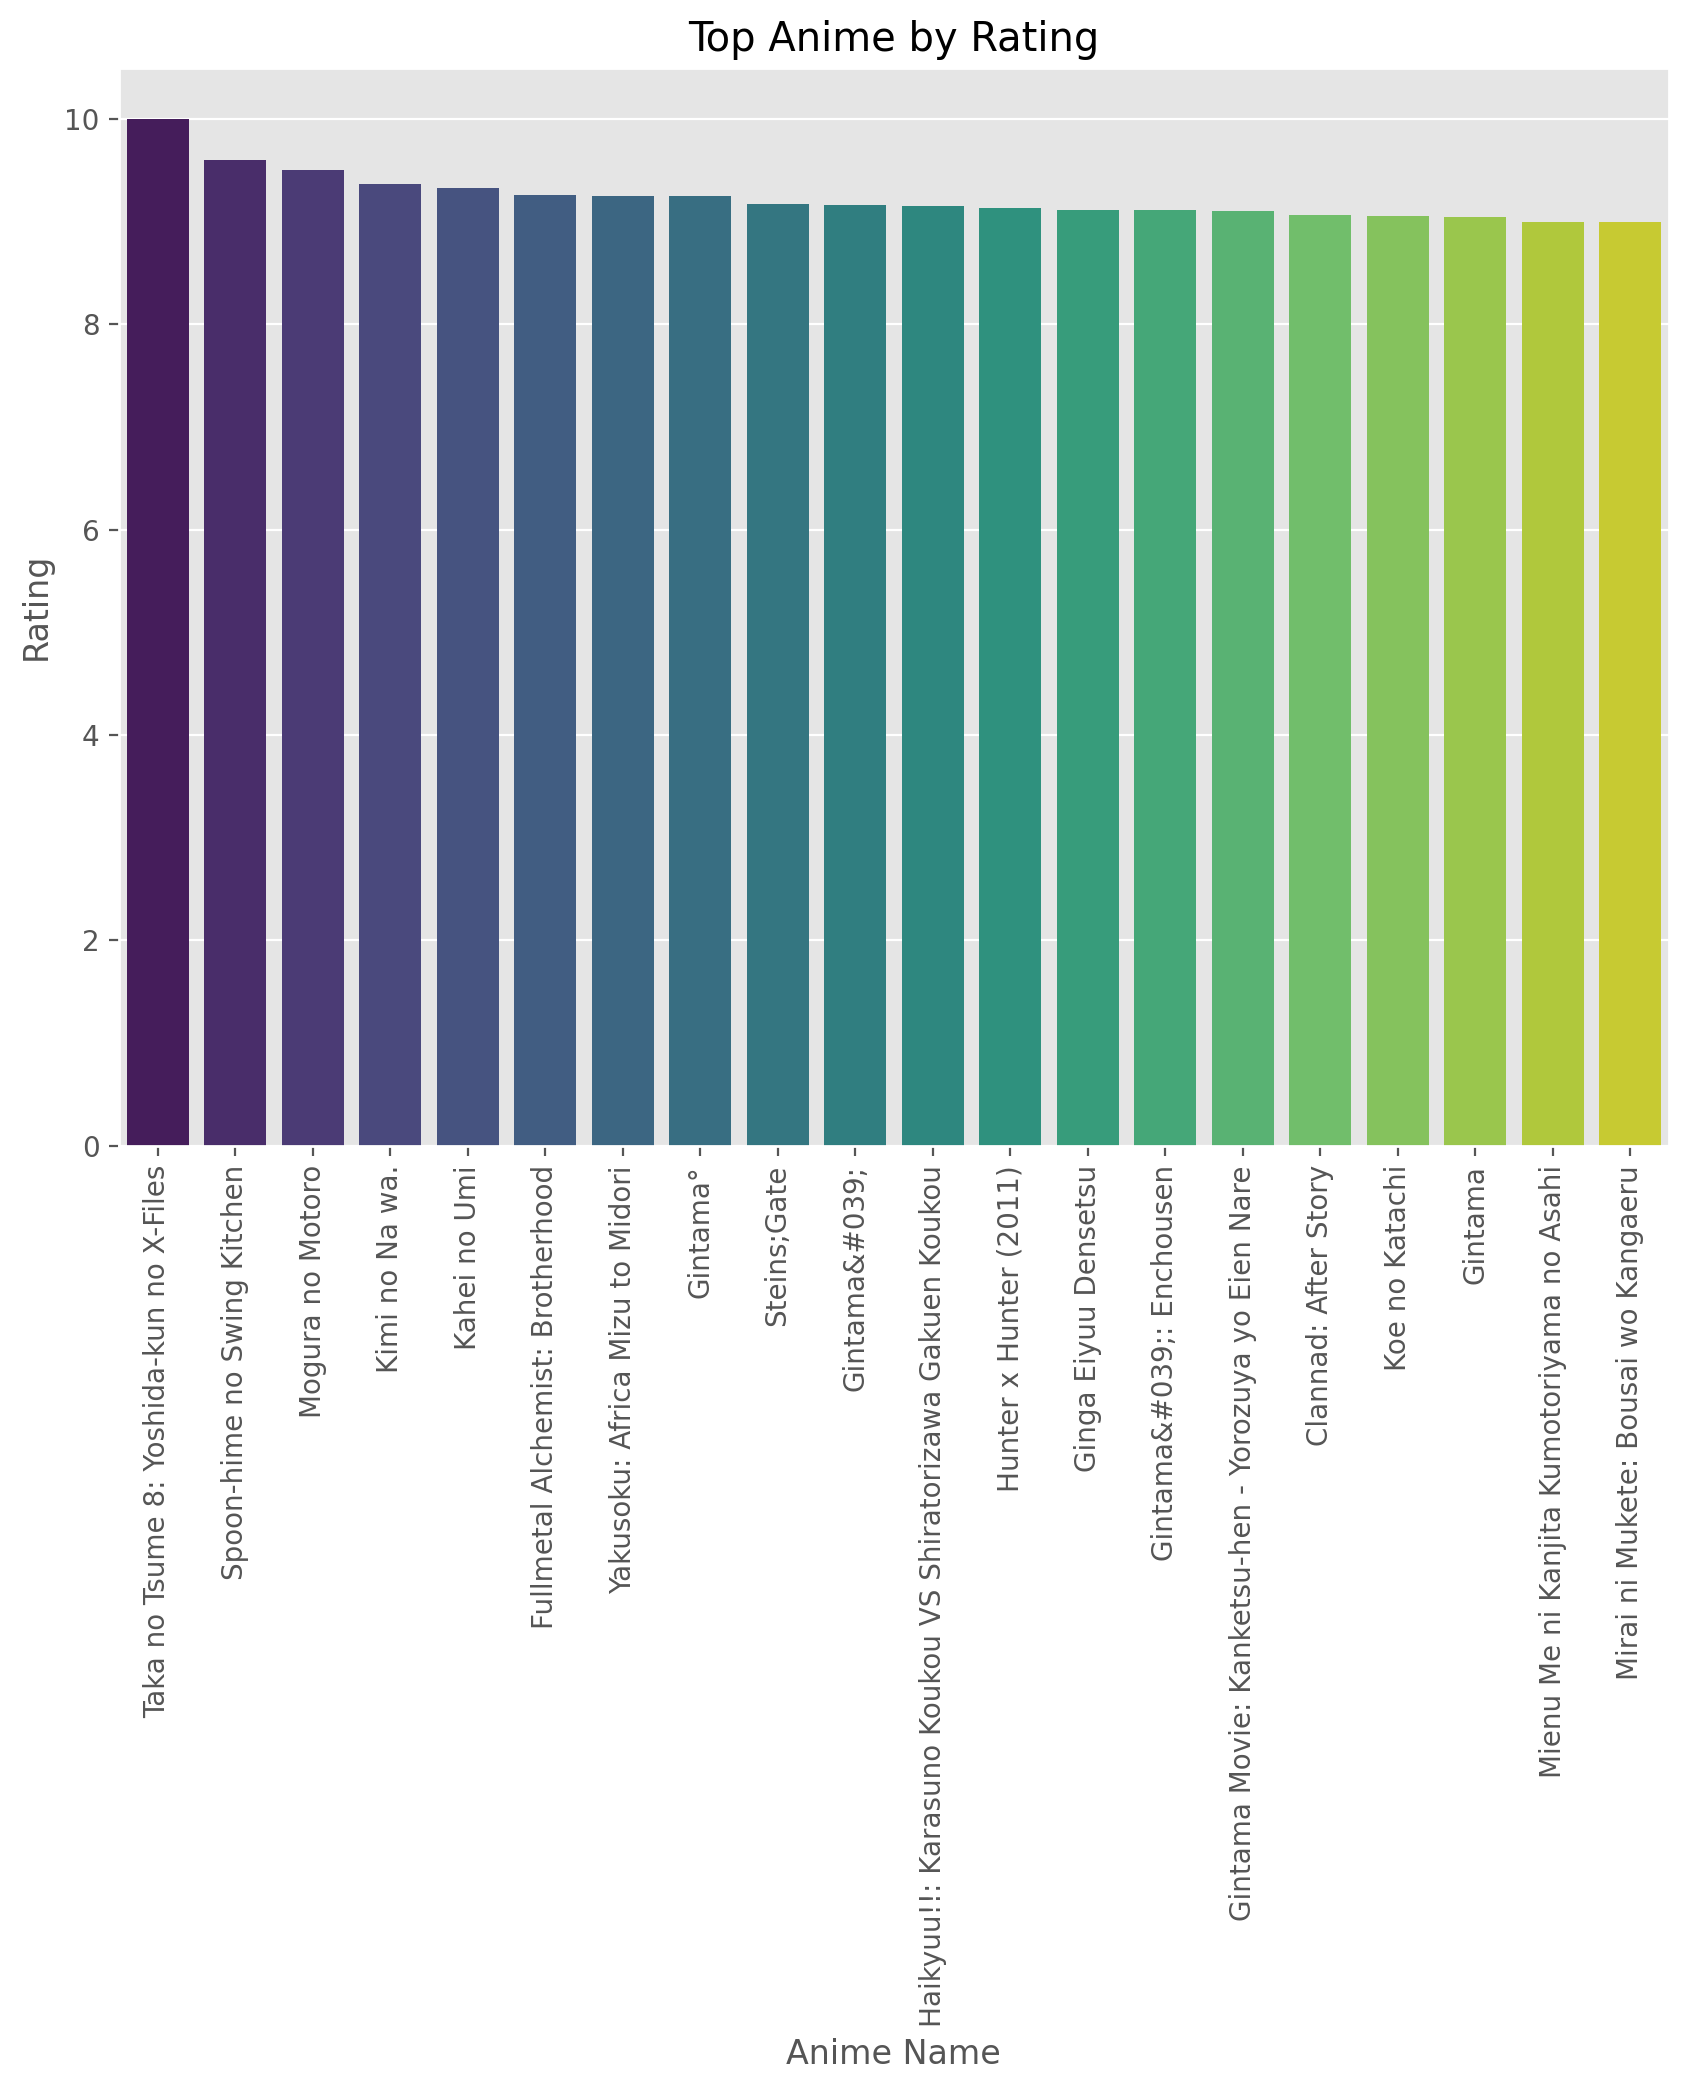

In [25]:
top_anime = anime.sort_values(by="rating", ascending=False)

# Set a custom color palette for the bar plot
custom_palette = sns.color_palette("viridis", len(top_anime[:20]))

sns.barplot(
    x=top_anime["name"][:20],
    y=top_anime["rating"][:20],
    palette=custom_palette  # Use the custom color palette
)
plt.xlabel("Anime Name")
plt.ylabel("Rating")
plt.title("Top Anime by Rating")
plt.xticks(rotation=90)

plt.show()

In [26]:
anime.value_counts("type")

type
TV         3812
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

Anime Category Distribution
type
TV         31.01
OVA        26.93
Movie      19.10
Special    13.63
ONA         5.36
Music       3.97
Name: proportion, dtype: float64


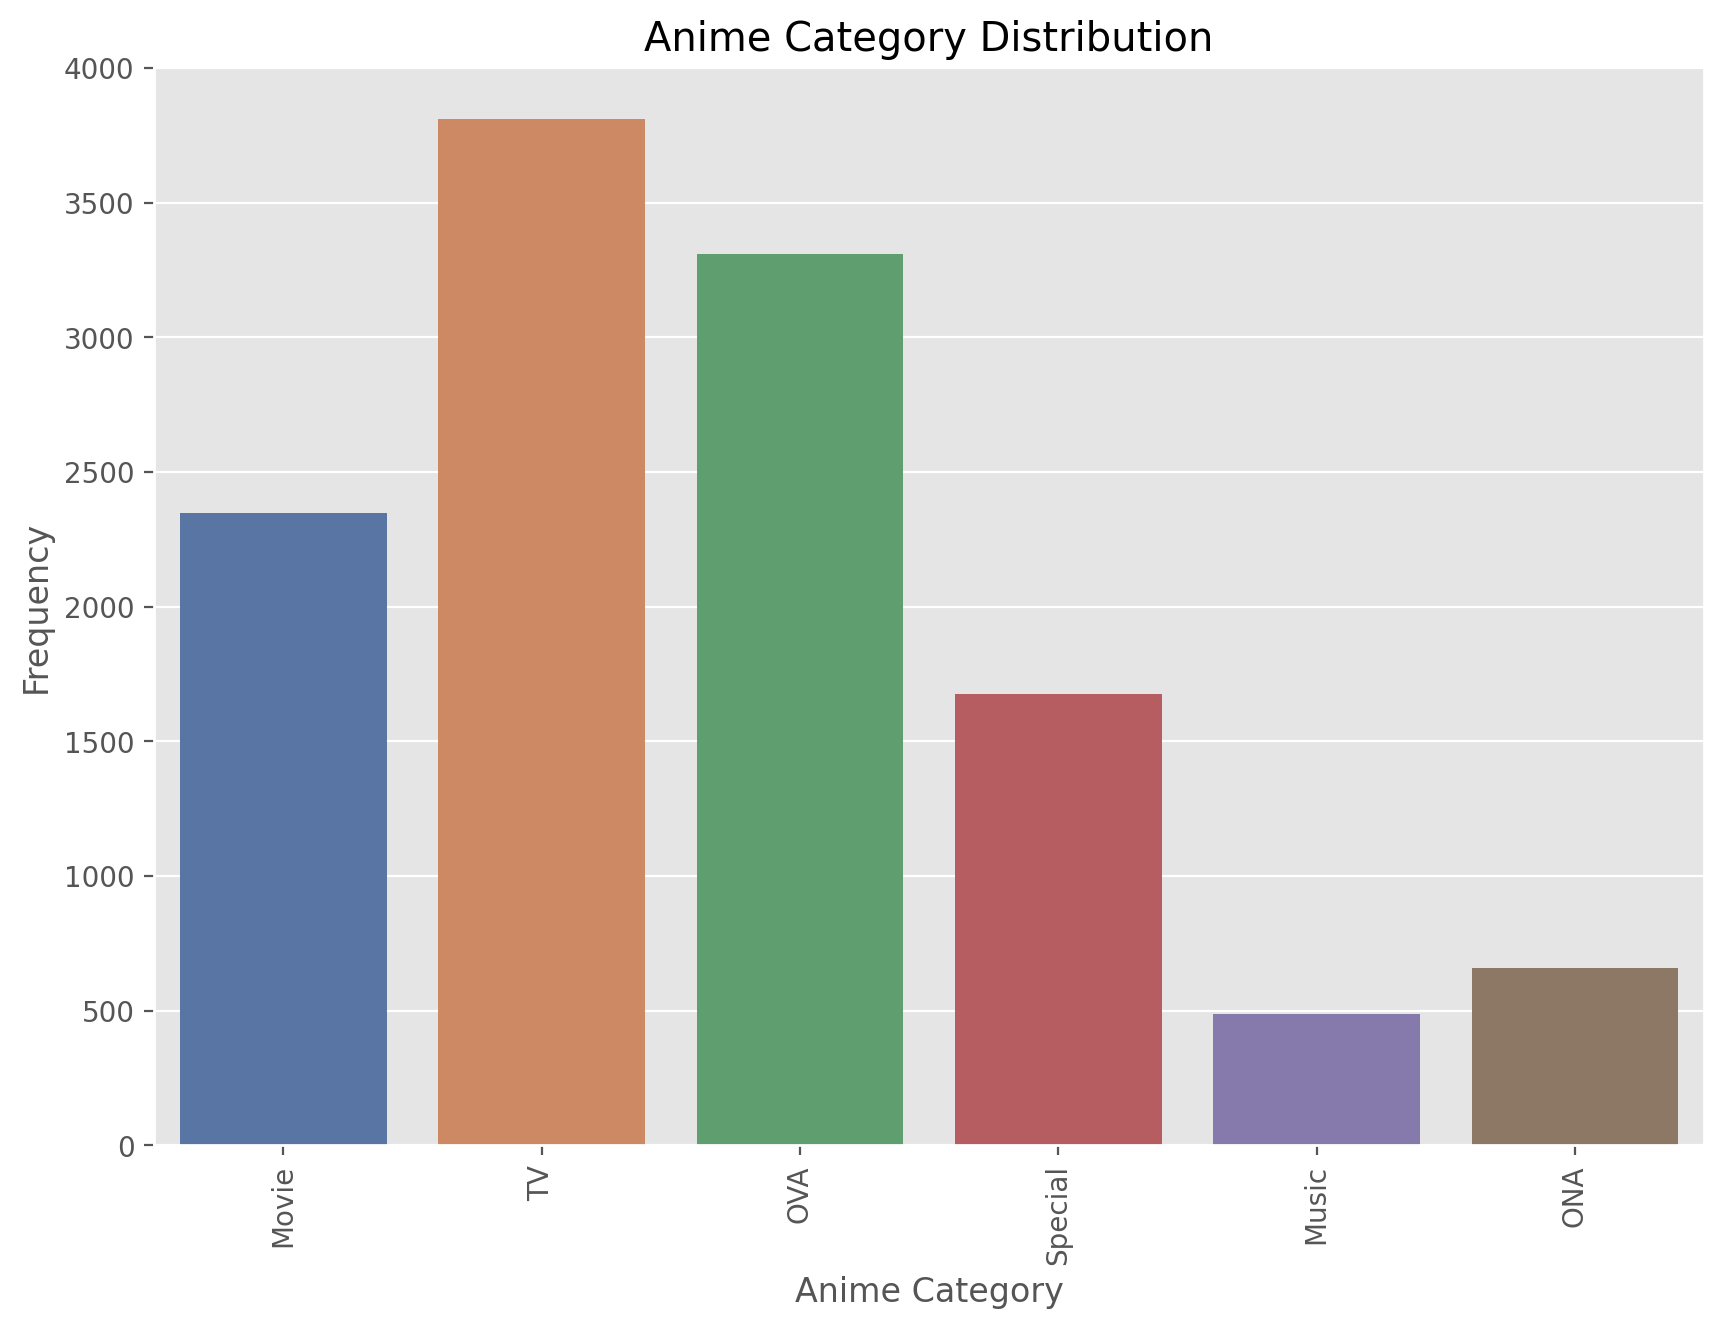

In [27]:
print("Anime Category Distribution")
print(round(anime.value_counts("type",normalize=True).mul(100),2))

sns.countplot(data=anime,x='type')
plt.xlabel("Anime Category")
plt.ylabel('Frequency')
plt.title("Anime Category Distribution")
plt.xticks(rotation=90)

plt.show()

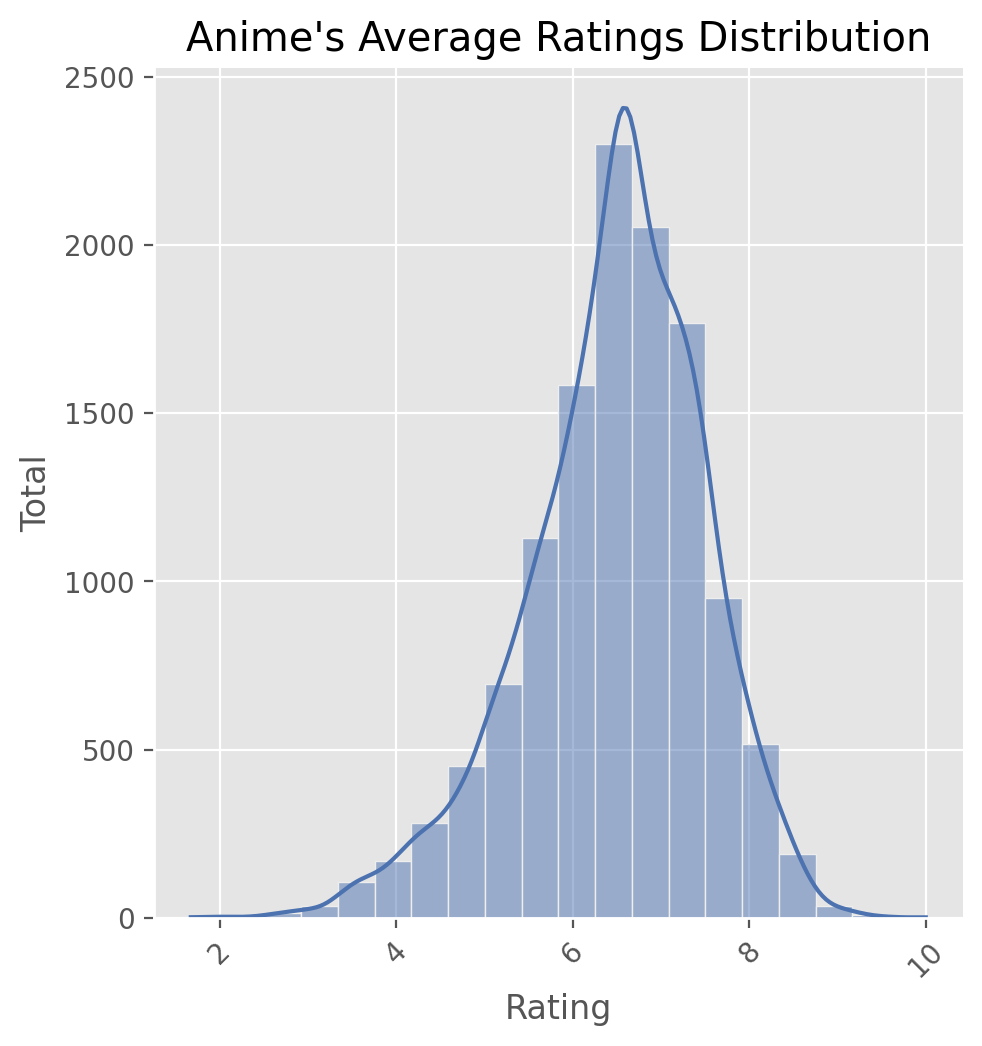

In [28]:
sns.displot(data=anime, x='rating',kde=True,bins=20)
plt.xlabel('Rating')
plt.ylabel('Total')
plt.title("Anime's Average Ratings Distribution")
plt.xticks(rotation=45)

plt.show()

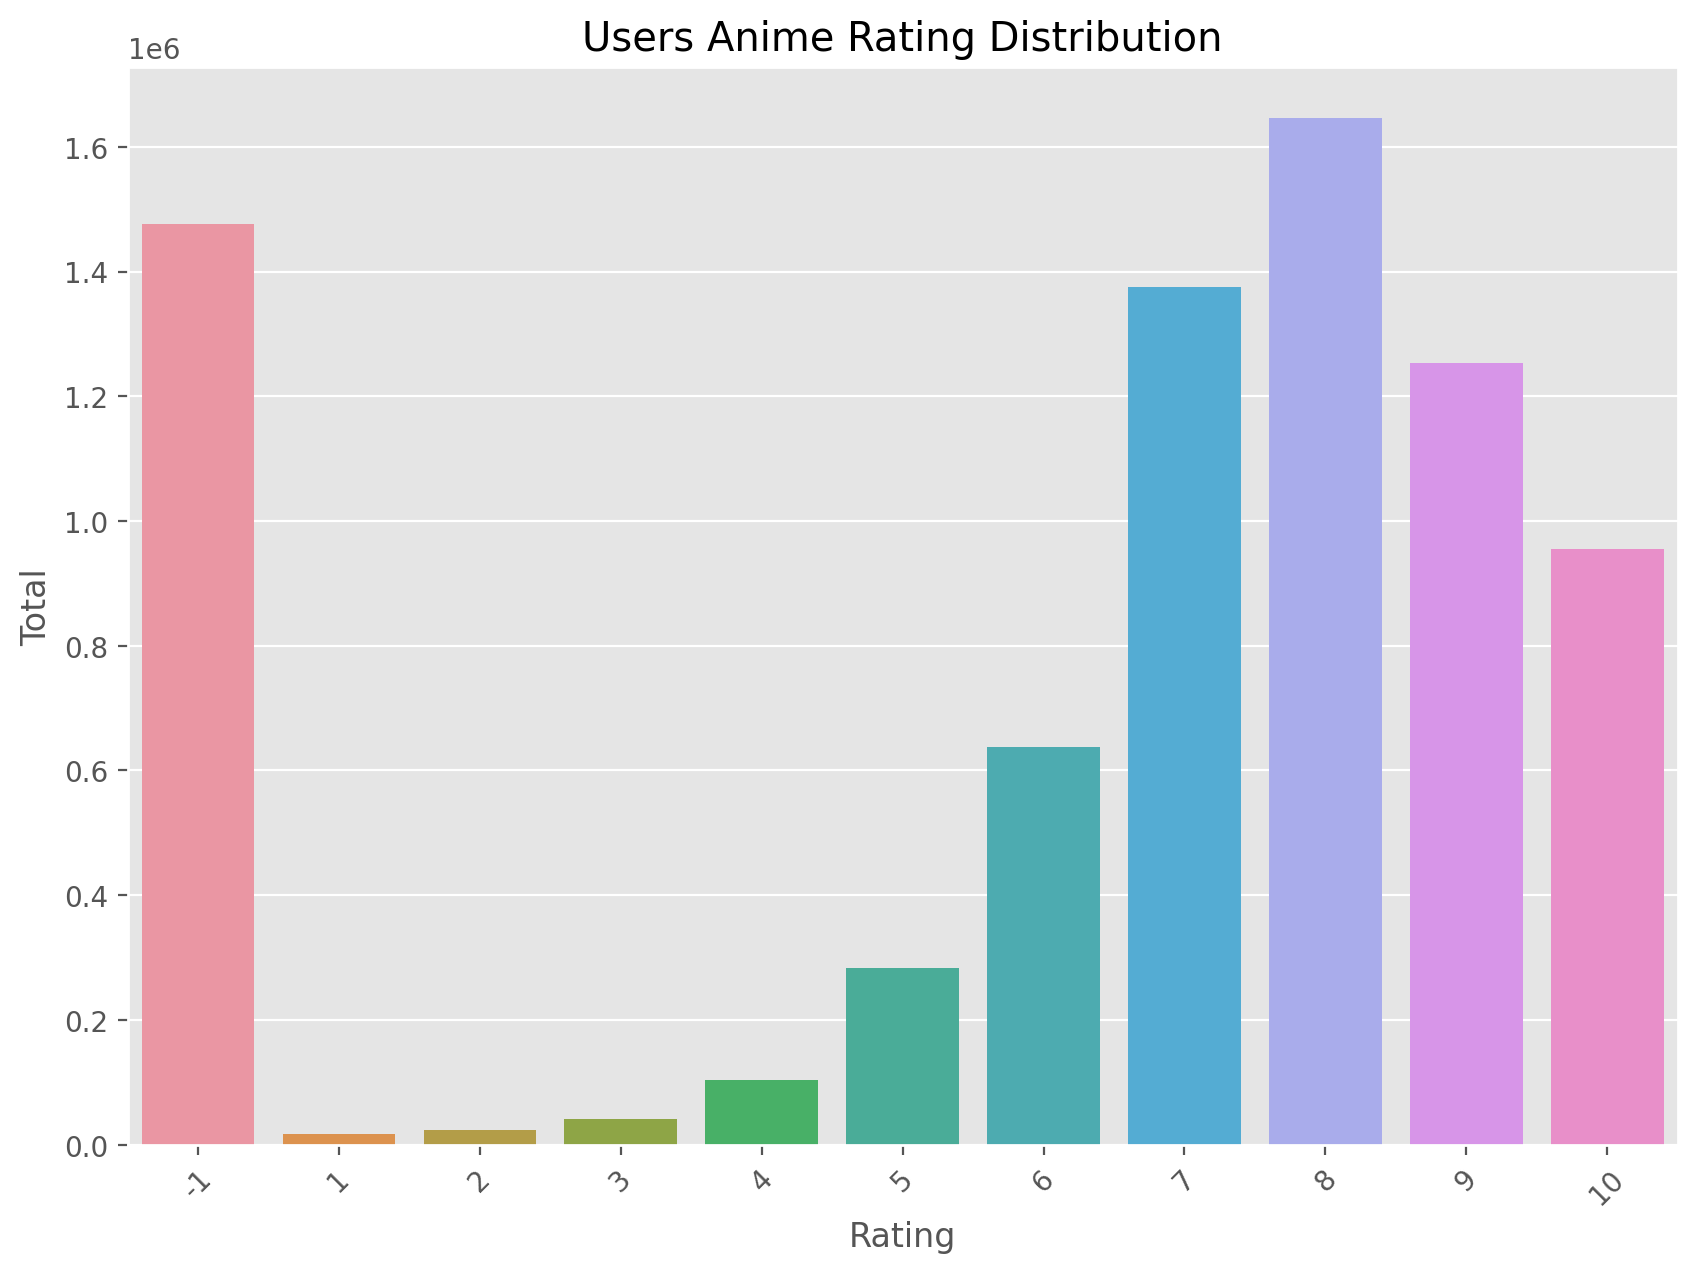

In [29]:
user_rating_count = df['user_rating'].value_counts().sort_index()

sns.barplot(x=user_rating_count.index,y=user_rating_count.values)
plt.xlabel('Rating')
plt.ylabel('Total')
plt.title("Users Anime Rating Distribution")
plt.xticks(rotation=45)

plt.show()

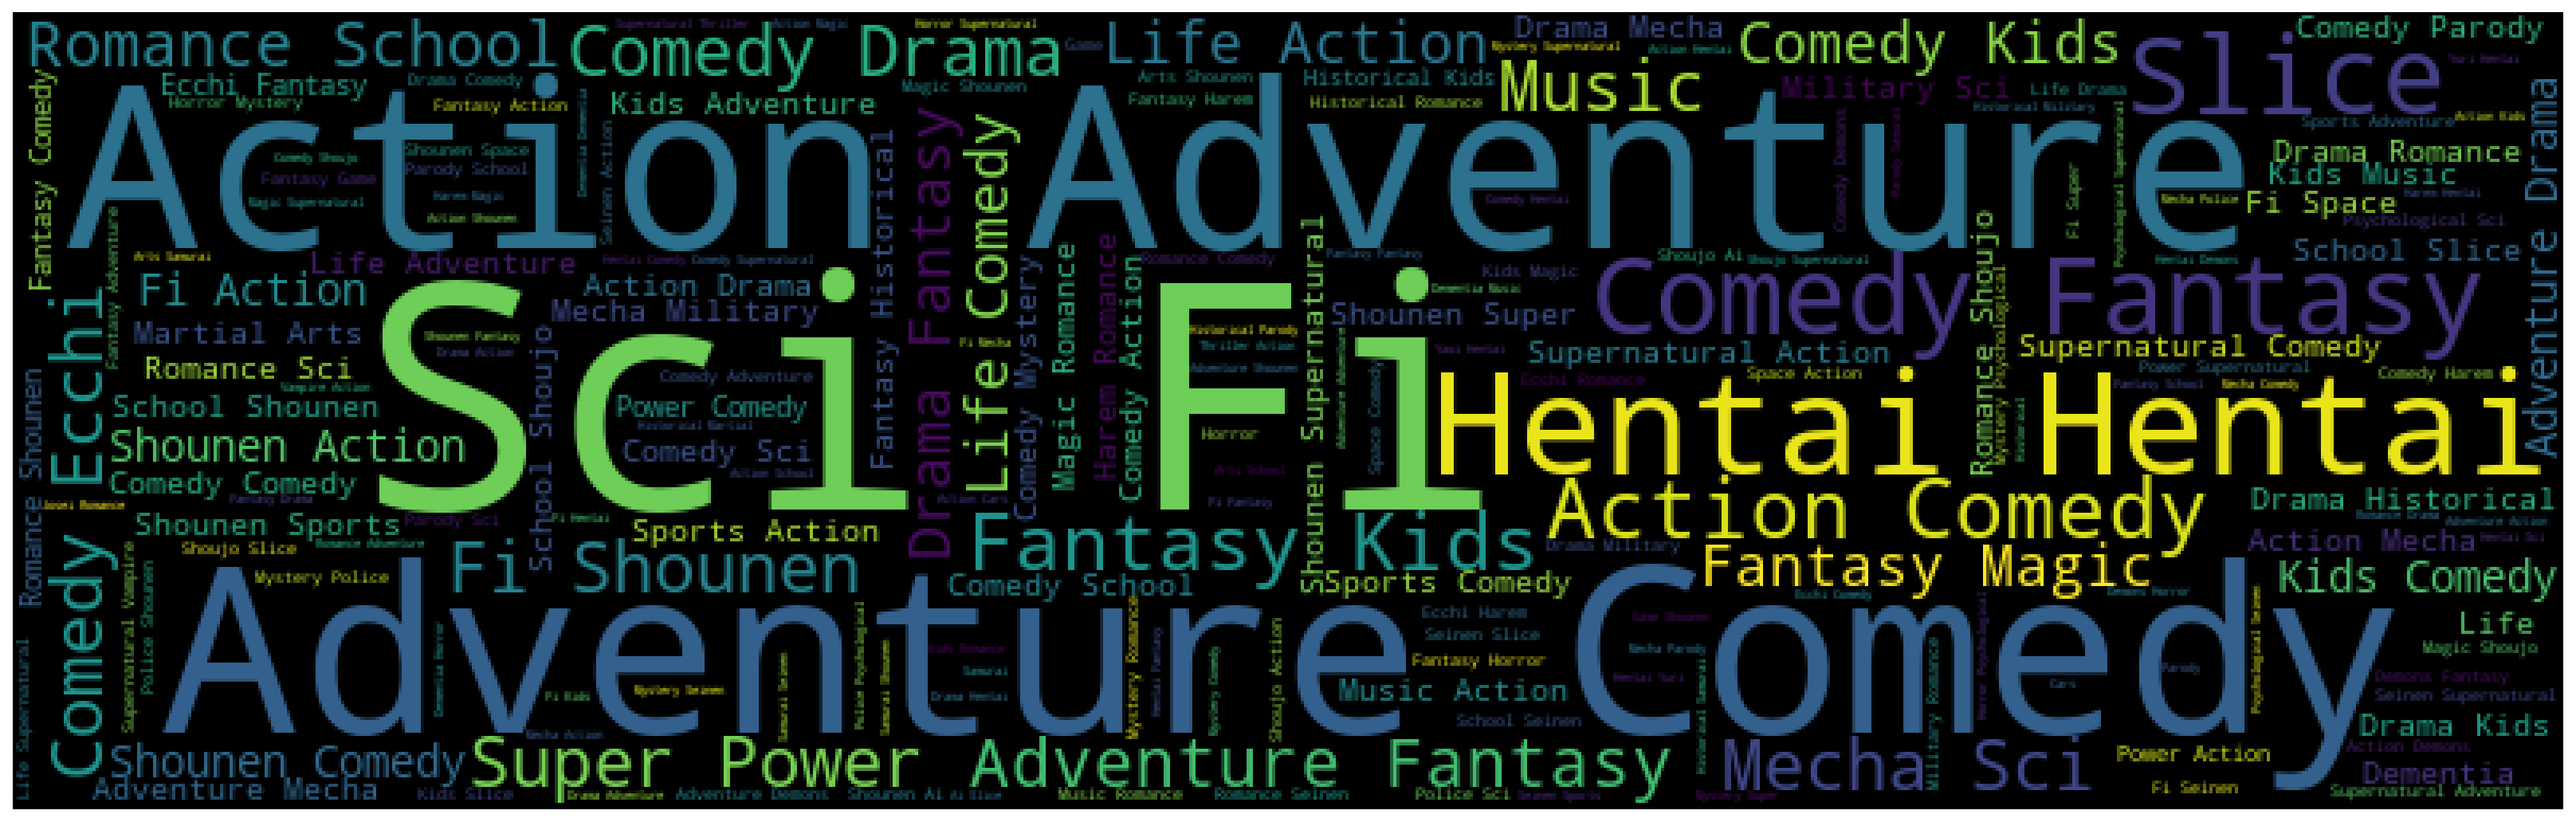

In [30]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250,max_font_size=100).generate(anime["genre"].str.cat(sep=", | , | ,"))

plt.figure(figsize = (20, 8)) 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

In [31]:
df["user_rating"].replace(to_replace = -1, value = np.nan, inplace = True)
df = df.dropna(axis = 0)
df.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [32]:
df.shape

(6337239, 9)

In [33]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

df["name"] = df["name"].apply(text_cleaning)

In [34]:
#Extract Review count
review_count_data = df.groupby('anime_id').size().reset_index()
review_count_data.columns = ['anime_id','review_count']

#Merge Review count with original data
df = df.merge(review_count_data,on='anime_id')

df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating,review_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,1961
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,1961
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,1961
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,1961
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0,1961


In [35]:
times_rated = rating.groupby(['anime_id'])['rating'].count()
times_rated = times_rated.rename('times_rated')

In [36]:
rating = rating.merge(times_rated,on='anime_id')

In [37]:
rating_top50 = rating[rating['times_rated']>51]

In [38]:
anime_rating = anime.merge(rating_top50,on='anime_id')
anime_rating

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,times_rated
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1,2199
...,...,...,...,...,...,...,...,...,...,...
7746271,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,73348,4,2475
7746272,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,73350,-1,2475
7746273,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,73389,7,2475
7746274,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,73407,-1,2475


In [41]:
anime_pivot_df = pd.pivot_table(index='name',columns='user_id',values='rating_y', data=anime_rating)

anime_pivot_df.fillna(value=0,inplace=True)

In [42]:
from scipy.sparse import csr_matrix
anime_mat = csr_matrix(anime_pivot_df.values)

In [43]:
from sklearn.neighbors import NearestNeighbors
anime_nbrs = NearestNeighbors(metric='cosine', algorithm='auto').fit(anime_mat)
distances, indices = anime_nbrs.kneighbors(anime_mat)

In [44]:
anime_names = list(anime_pivot_df.index)


In [54]:
Death_Note_index = anime_names.index('Death Note')
distances, indices = anime_nbrs.kneighbors(anime_pivot_df.iloc[Death_Note_index,:].values.reshape(1,-1),n_neighbors=6)

In [53]:
indices_flat, distances_flat = indices.flatten(),distances.flatten()
for index,anime_index in enumerate(indices_flat):
    anime_name = anime_names[anime_index]
    if(index == 0): 
        print(f'Animes similar to {anime_name}:')
    else:
        print(f'\t {anime_name} with score ---> {distances_flat[index]}')

Animes similar to Fullmetal Alchemist: Brotherhood:
	 Fullmetal Alchemist with score ---> 0.4250805469763258
	 Death Note with score ---> 0.43921006578894195
	 Shingeki no Kyojin with score ---> 0.44854208338529955
	 Code Geass: Hangyaku no Lelouch with score ---> 0.45105992807716344
	 Code Geass: Hangyaku no Lelouch R2 with score ---> 0.45582218970991095
